# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice
len(combined["Mouse ID"].unique())

249

In [3]:
#Column Names
combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mask = combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mouse_ids = combined.loc[duplicate_mask, 'Mouse ID'].unique()
print(duplicate_mouse_ids)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = combined[combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicates)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = combined[~combined['Mouse ID'].isin(duplicate_mouse_ids)]

In [7]:
# Checking the number of mice in the clean DataFrame.
len(df_cleaned["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
df_cleaned.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [9]:
# Generate a summar statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_1 = df_cleaned.set_index(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
combined_1['Tumor Volume (mm3)'] = combined_1['Tumor Volume (mm3)'].astype(np.int64)
mean = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
median = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
variance = combined_1.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
STD = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
sem = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()


In [10]:
# Create DataFrame with retrieved values
regimen_summary = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance, \
                               "Tumor Volume Std. Dev.":STD,"Tumor Volume Std.Err.":sem})
# Display DataFrame
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.213043,41.0,25.513366,5.051076,0.333058
Ceftamin,52.157303,51.0,38.347997,6.192576,0.464153
Infubinol,52.466292,51.0,42.114677,6.489582,0.486415
Ketapril,54.803191,53.0,67.816674,8.235088,0.600606
Naftisol,53.924731,52.0,64.610520,8.038067,0.589380
Placebo,53.607735,52.0,60.473051,7.776442,0.578018
Propriva,51.885135,50.0,42.483315,6.517923,0.535770
Ramicane,39.780702,40.0,24.022181,4.901243,0.324593
Stelasyn,53.823204,52.0,58.468570,7.646474,0.568358


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
regimen2 = combined_1.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
regimen2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.213043,41.0,25.513366,5.051076,0.333058
Ceftamin,52.157303,51.0,38.347997,6.192576,0.464153
Infubinol,52.466292,51.0,42.114677,6.489582,0.486415
Ketapril,54.803191,53.0,67.816674,8.235088,0.600606
Naftisol,53.924731,52.0,64.610520,8.038067,0.589380
Placebo,53.607735,52.0,60.473051,7.776442,0.578018
Propriva,51.885135,50.0,42.483315,6.517923,0.535770
Ramicane,39.780702,40.0,24.022181,4.901243,0.324593
Stelasyn,53.823204,52.0,58.468570,7.646474,0.568358


## Bar and Pie Charts

In [12]:
#Display DataFrame
combined_1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45,0,Female,9,22
Ketapril,f932,0,45,0,Male,15,29
Ketapril,g107,0,45,0,Female,2,29
Ketapril,a457,0,45,0,Female,11,30
Ketapril,c819,0,45,0,Male,21,25


<Axes: xlabel='Drug Regimen'>

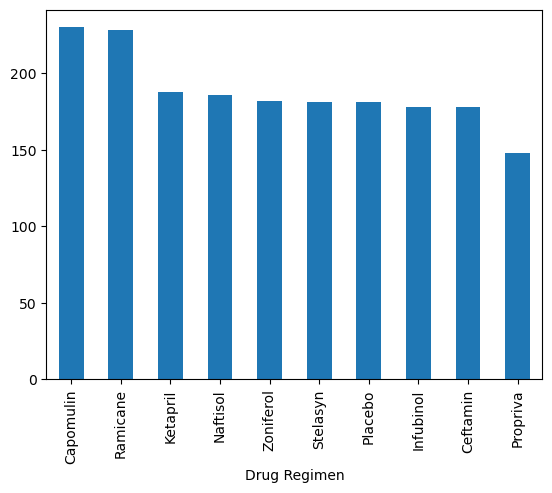

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = combined_1.index.value_counts()
counts.plot(kind="bar")

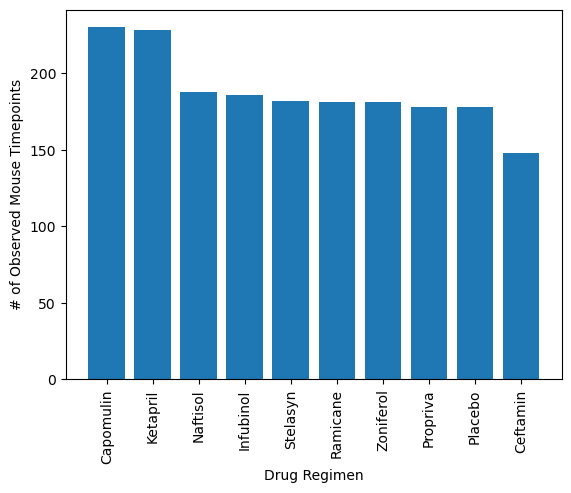

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = combined_1.index.unique()
plt.bar(x,counts,alpha=1)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

<Axes: title={'center': 'Distribution of Female vs. Male Mice'}, ylabel='count'>

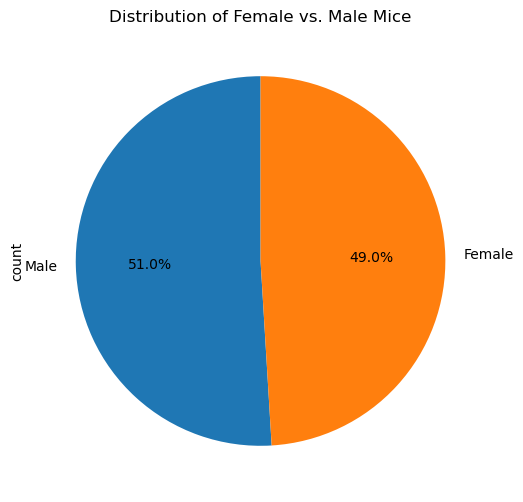

In [15]:
# Get the unique mice with their gender
sex_counts = combined_1['Sex'].value_counts()
# Make the pie chart
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), title='Distribution of Female vs. Male Mice')

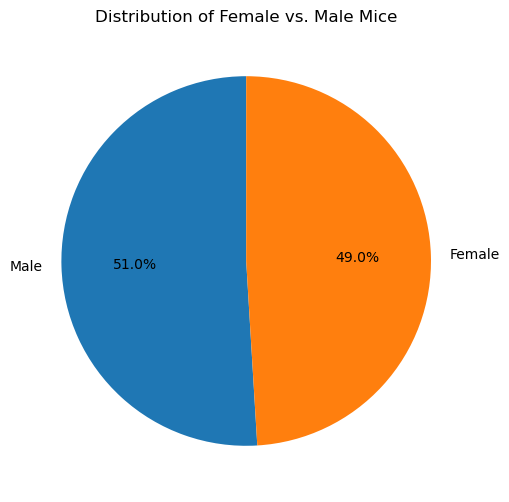

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Generate the pie chart
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show the pie chart
plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
maximums = combined_1.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
final_data = pd.merge(maximums, combined, on=['Mouse ID', 'Timepoint'], how='left')

# Filter by the treatment regimens you're interested in
final_tumor_volumes = final_data[final_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

In [18]:
# List of treatments we are interested in
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# For each treatment regimen, get tumor volumes and calculate the IQR
for treatment in treatments:
    # Filter the data for each treatment regimen
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for this treatment
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    
    # Calculate the IQR for the tumor volumes
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the outliers using the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers (values below lower_bound or above upper_bound)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print outliers for each treatment regimen
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


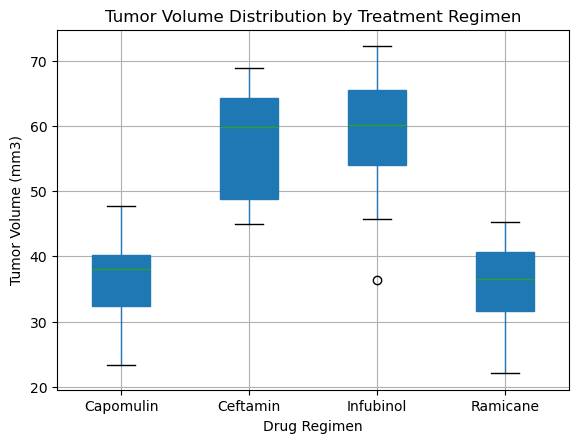

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
final_tumor_volumes.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', vert=True, patch_artist=True)

# Add labels and title
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.suptitle('')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

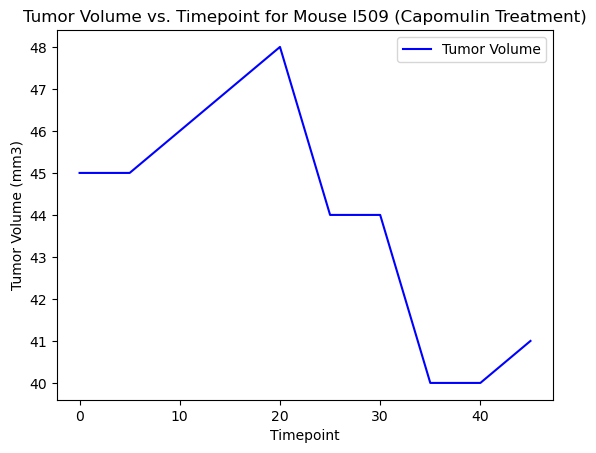

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = combined_1[(combined_1.index == 'Capomulin') & (combined_1['Mouse ID'] == 'l509')]

# Plot tumor volume vs. timepoint for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-', label='Tumor Volume')

# Add labels and title
plt.title('Tumor Volume vs. Timepoint for Mouse l509 (Capomulin Treatment)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.legend()
plt.show()

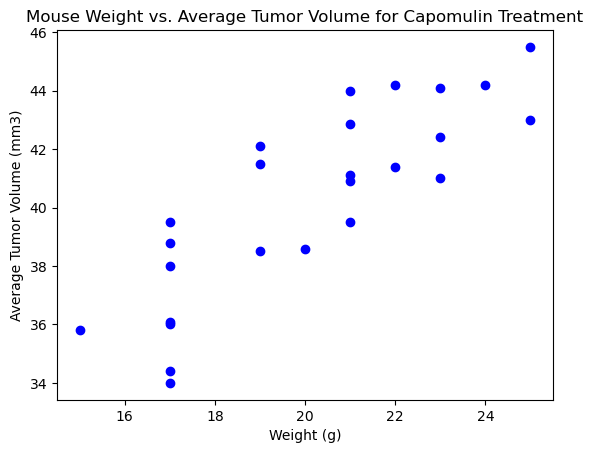

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin treatment
capomulin_data = combined_1[combined_1.index == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with the mouse weight data
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volumes, mouse_weights, on='Mouse ID')

# Create the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


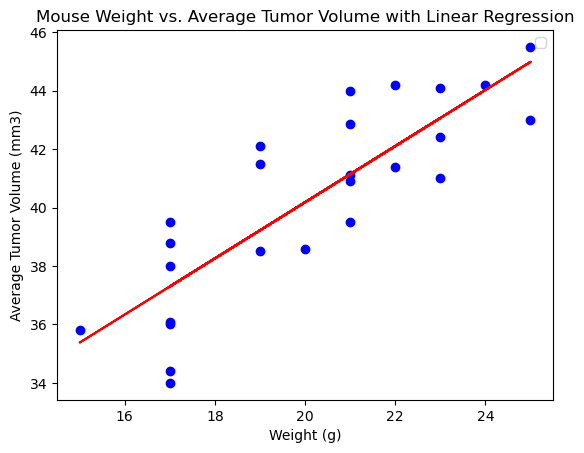

In [23]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])


# Plot the regression line
# Create a linear regression line using the slope and intercept
line = slope * merged_data['Weight (g)'] + intercept

# Plot the scatter plot and the regression line
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b')
plt.plot(merged_data['Weight (g)'], line, color='r')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.show()